In [651]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model

In [652]:
# Reading the csv file to get the data
ds = pd.read_csv('Baseball.csv')
ds

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


For predicting the number of wins a baseball team will attain -- based on the given input features, a linear regression approach is neccessary. 'WIN' is target variable.

In [653]:
# Shape of the dataset
ds.shape

(30, 17)

In [654]:
print ('Shape of dataset before removing duplicates: ', ds.shape)
# Dropping the duplicate rows
ds = ds.drop_duplicates(keep='first')
print ('Shape of dataset after removing duplicates: ', ds.shape)

Shape of dataset before removing duplicates:  (30, 17)
Shape of dataset after removing duplicates:  (30, 17)


In [655]:
# Printing the head of data
ds.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [656]:
# Checking the columns of the dataset
ds.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [657]:
# Checking the datatypes of columns
ds.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [658]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.2 KB


# Summary Statistics

In [659]:
ds.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Key Observation

There is sometimes mean is greater than median and sometimes median is greater than mean

EDA: 
Exploratory Data Analysis
Exploring Data Variable
    
Target/Dependent variable is continues in nature


# Data Visualization

In [660]:
ds.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [661]:
# Checking for NaN values
ds.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

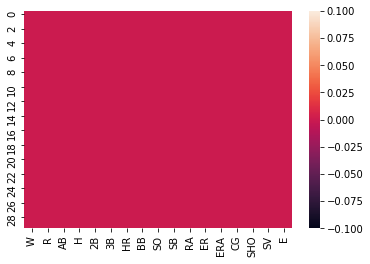

In [662]:
sns.heatmap(ds.isnull())
plt.show()

dataset has no missing values.
If there were any, there would be different color shades in the figure.

# To check correlation

In [663]:
ds.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


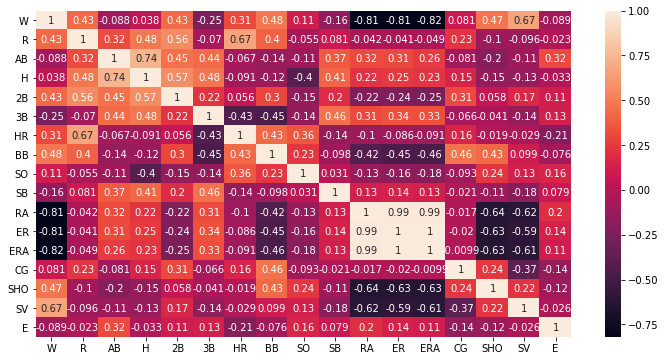

In [664]:

plt.figure(figsize=(12, 6))
sns.heatmap(ds.corr(), annot=True)
plt.show()

Above heatmap shows the correlation between different features, how they are co rrelated with each other

# Plotting Outliers

Univariate Analysis

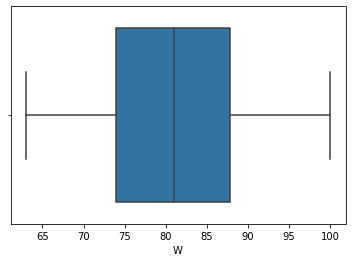

In [665]:
sns.boxplot(ds['W'])

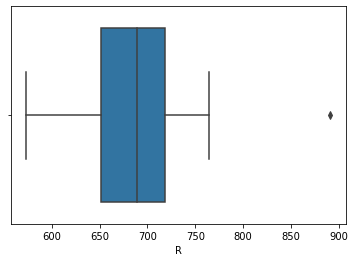

In [666]:
sns.boxplot(ds['R'])

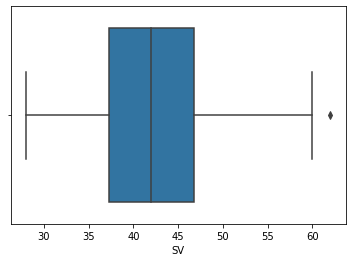

In [667]:
sns.boxplot(ds['SV'])

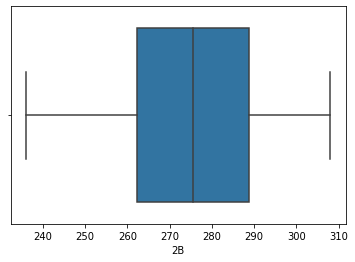

In [668]:
sns.boxplot(ds['2B'])
plt.show()

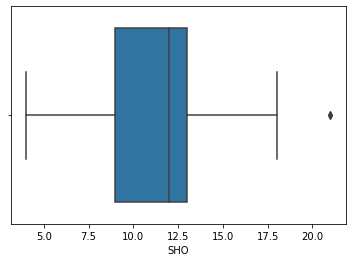

In [669]:
sns.boxplot(ds['SHO'])
plt.show()

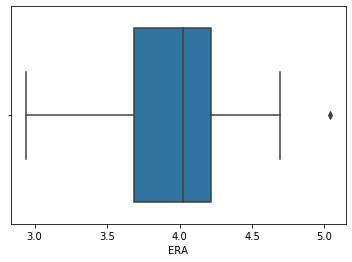

In [670]:
sns.boxplot(ds['ERA'])
plt.show()

Bivariate Analysis: Checking the relation of two features, how one variable changes with other
Here We are checking how 'WIN' is affected by other parameters

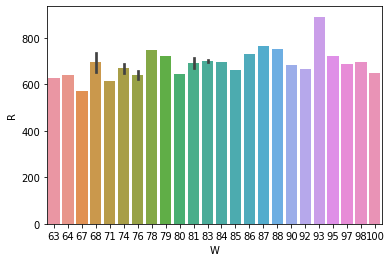

In [671]:
sns.barplot(x='W', y='R', data=ds)
plt.show()

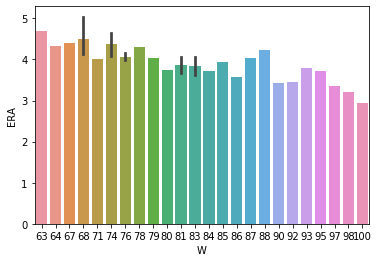

In [672]:
sns.barplot(x='W', y='ERA', data=ds)
plt.show()

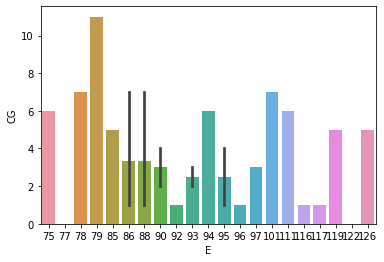

In [673]:
sns.barplot(x='E', y='CG', data=ds)
plt.show()

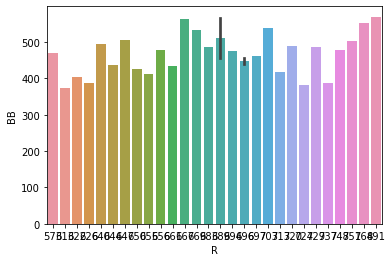

In [674]:
sns.barplot(x='R', y='BB', data=ds)
plt.show()

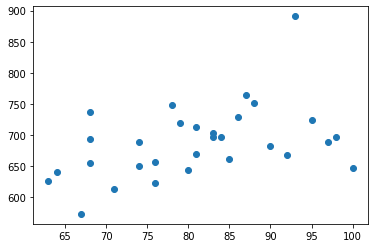

In [675]:
plt.scatter(ds['W'], ds['R'])
plt.show()

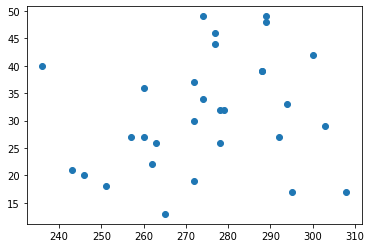

In [676]:
plt.scatter(ds['2B'], ds['3B'])
plt.show()

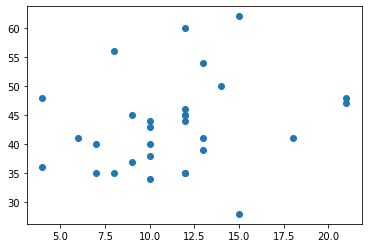

In [677]:
plt.scatter(ds['SHO'], ds['SV'])
plt.show()

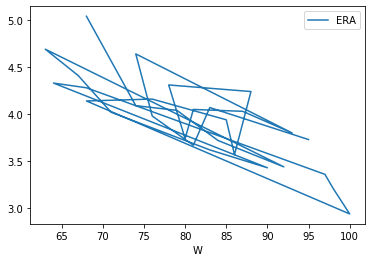

In [678]:
ds.plot(kind='line', x='W', y='ERA')
plt.show()

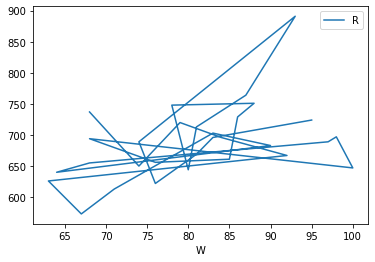

In [679]:
ds.plot(kind='line', x='W', y='R')
plt.show()

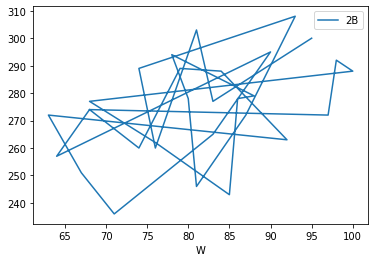

In [680]:
ds.plot(kind='line', x='W', y='2B')
plt.show()

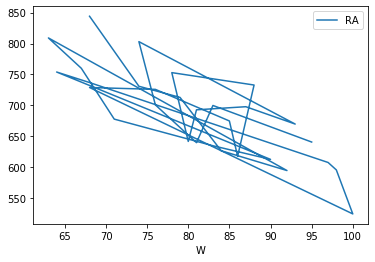

In [681]:
ds.plot(kind='line', x='W', y='RA')
plt.show()

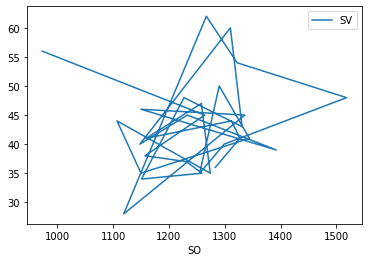

In [682]:
ds.plot(kind='line', x='SO', y='SV')
plt.show()

# Univariate Analysis: Violin plot show where the maximum values lies

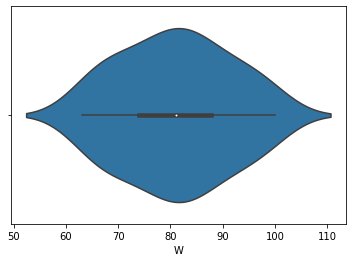

In [683]:
sns.violinplot(x=ds['W'])
plt.show()

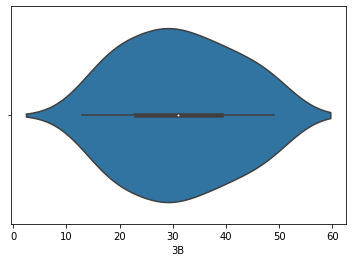

In [684]:
sns.violinplot(x=ds['3B'])

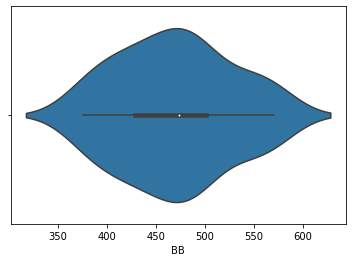

In [685]:
sns.violinplot(x=ds['BB'])
plt.show()

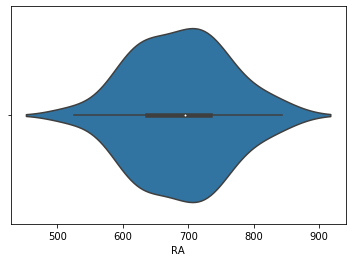

In [686]:
sns.violinplot(x=ds['RA'])
plt.show()

Checking the skewness of data by using skew()

In [687]:
ds.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [688]:
# Removing skewness of data
for col in ds.columns:
    if ds.skew().loc[col] > 0.55:
        ds[col] = np.log1p(ds[col])

In [689]:
ds.skew()

W      0.047089
R      0.744813
AB     0.183437
H      0.628584
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.325962
SHO   -0.589640
SV     0.163057
E      0.632916
dtype: float64

In [690]:
# Removing skewness of data
for i in range(1, 15):
    for col in ds.columns:
        if ds.skew().loc[col] > 0.55:
            ds[col] = np.log1p(ds[col])

In [691]:
ds.skew()

W      0.047089
R      0.641304
AB     0.183437
H      0.619511
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.325962
SHO   -0.589640
SV     0.163057
E      0.547824
dtype: float64

A pairs plot allows us to see both distribution of single variables and relationships between two variables . Pair plots are a great method to identify trends for follow-up analysis

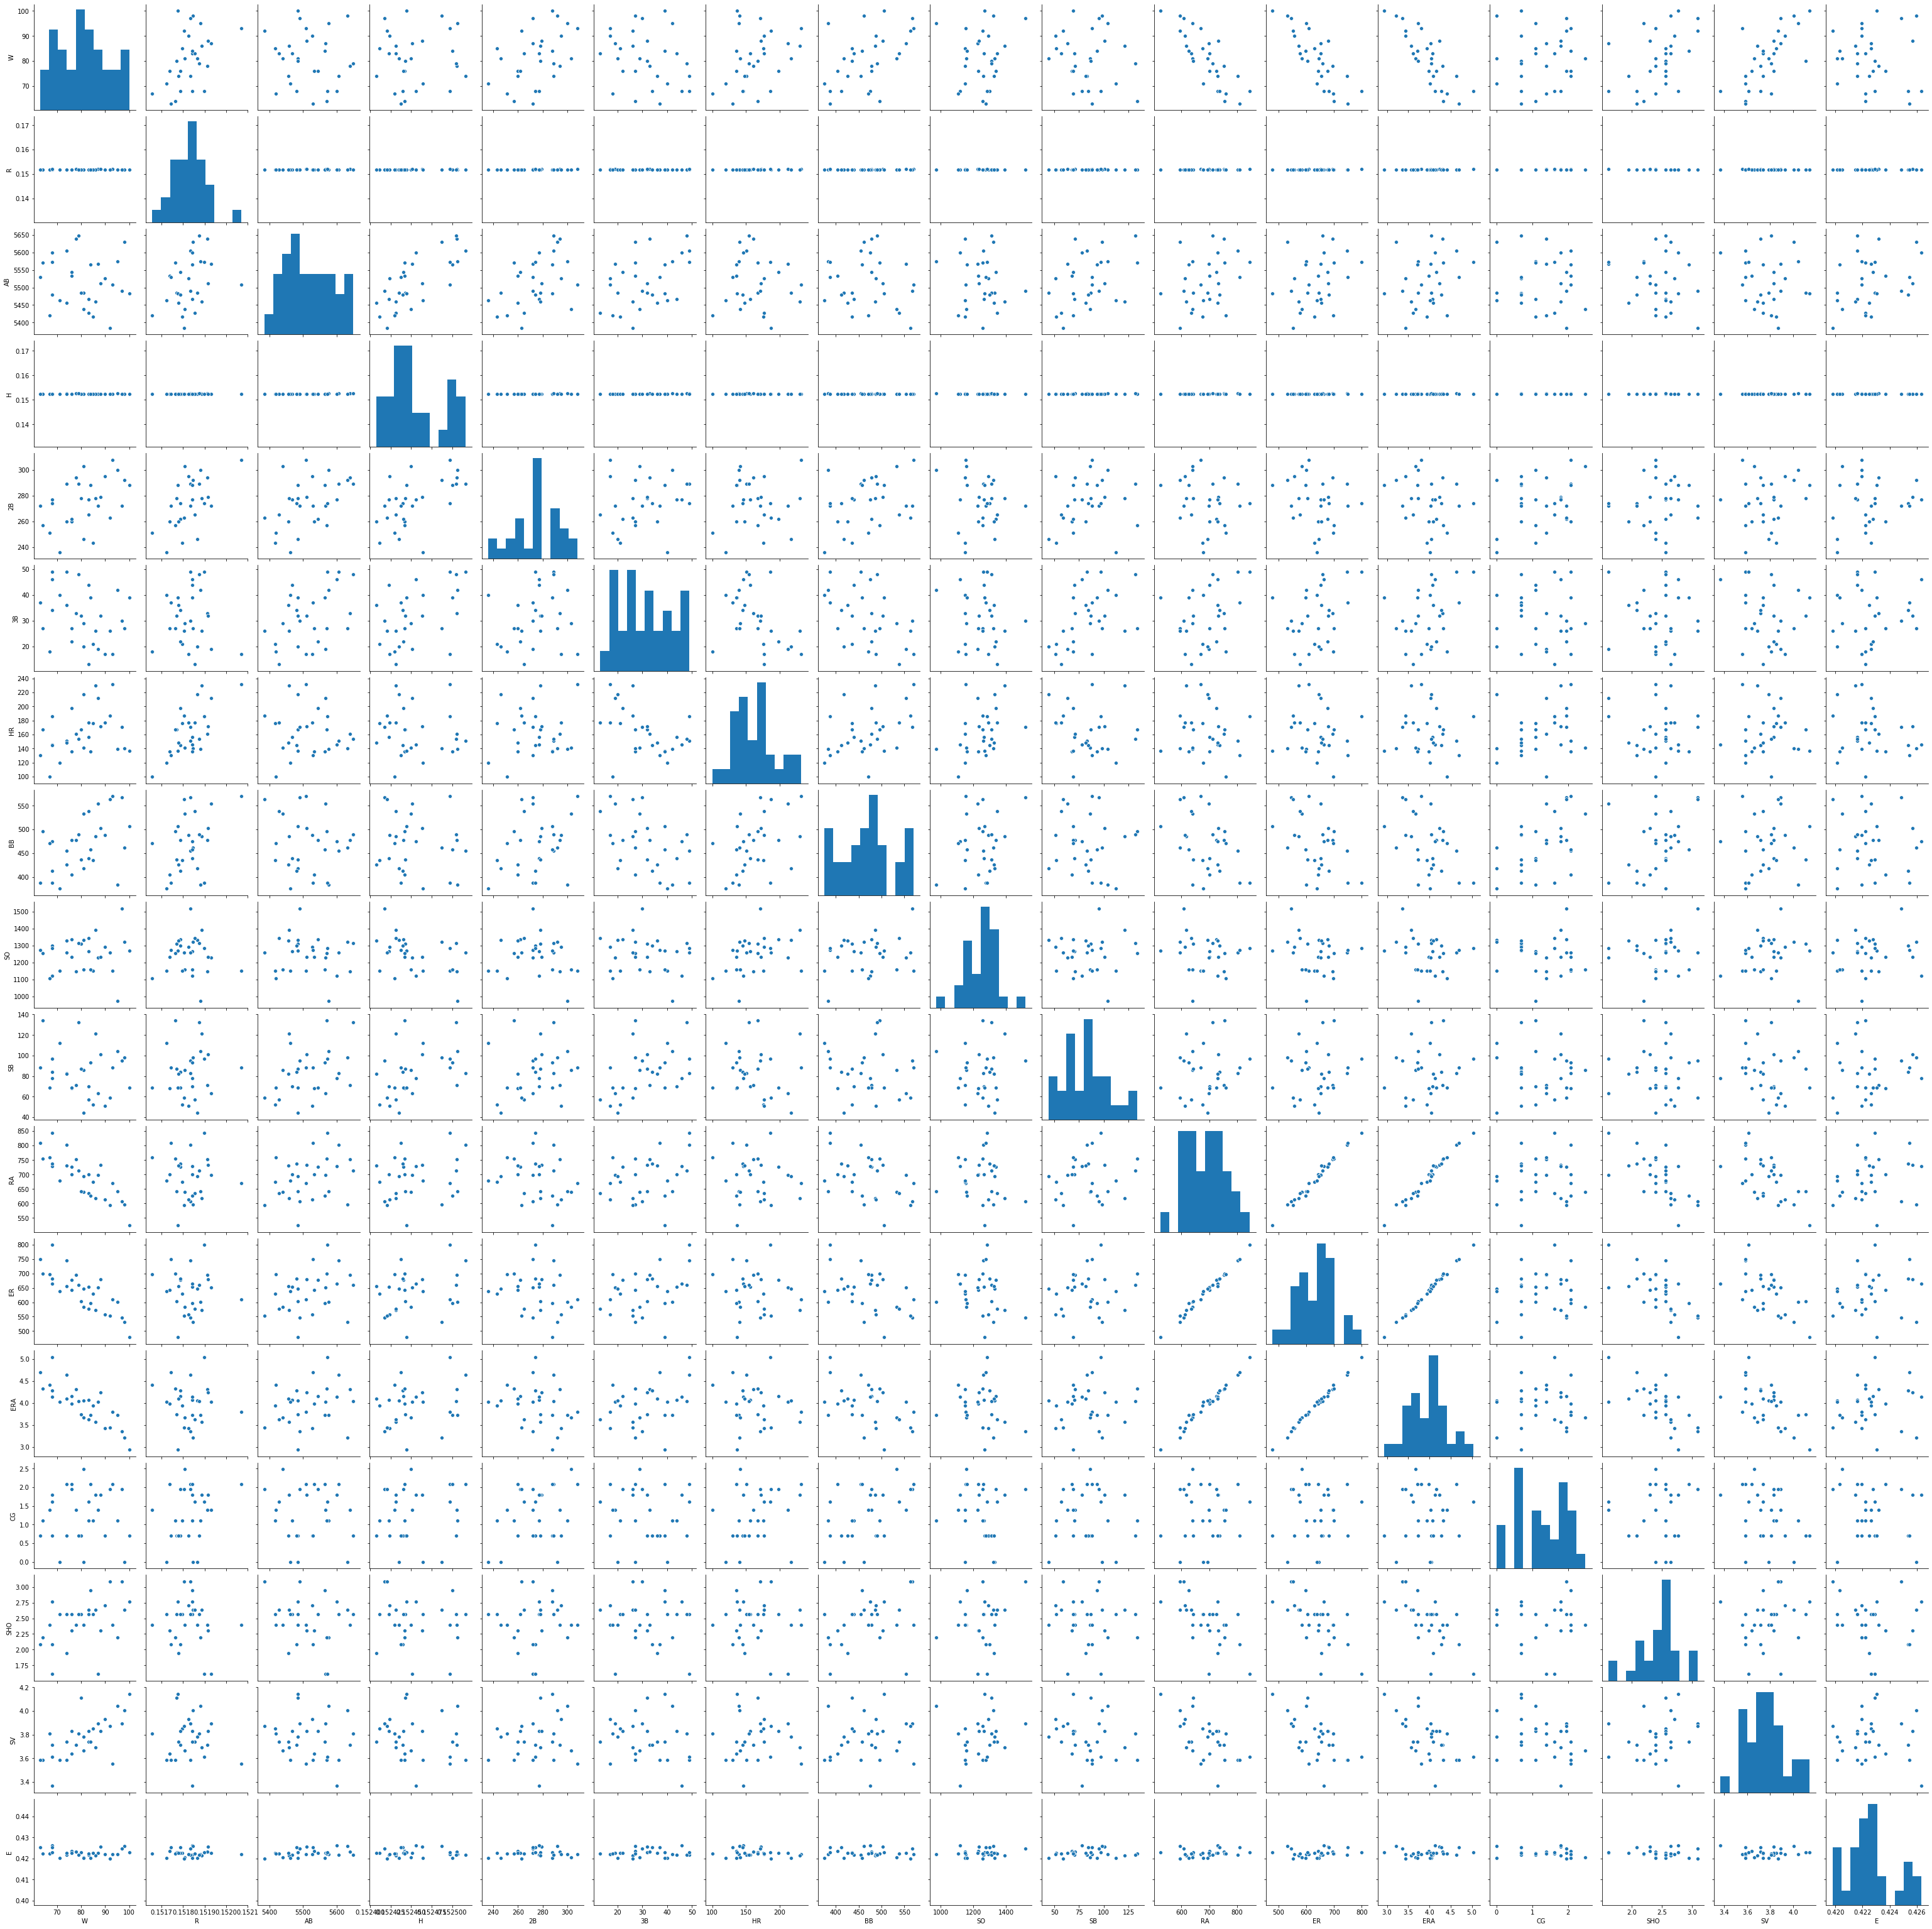

In [692]:
sns.pairplot(ds)
plt.show()

A histogram is a quick way to get information about a sample distribution without detailed statistical graphing or analysis.

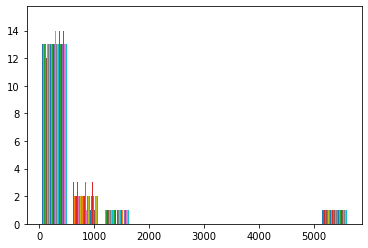

In [693]:
plt.hist(ds)
plt.show()

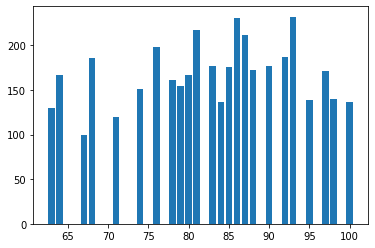

In [694]:
plt.bar(ds['W'], ds['HR'])
plt.show()

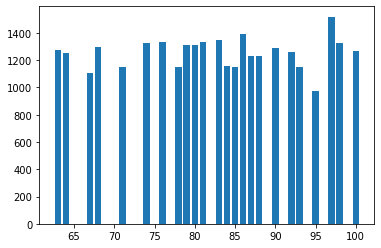

In [695]:
plt.bar(ds['W'], ds['SO'])
plt.show()

In [696]:

# Getting the values of columns
collist = ds.columns.values
collist

array(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA',
       'ER', 'ERA', 'CG', 'SHO', 'SV', 'E'], dtype=object)

In [697]:
ncols = 17
nrows = 18

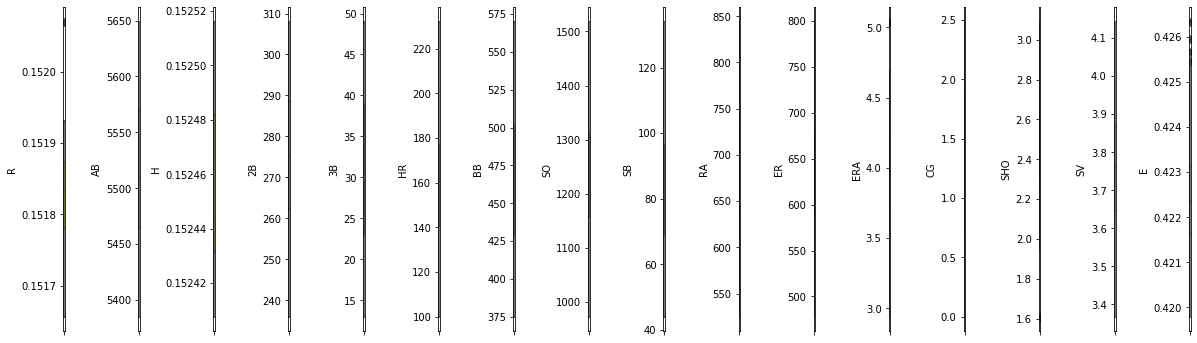

In [698]:
# plottig the boxplot to check for outliers

plt.figure(figsize=(ncols, 5*ncols))
for i in range(1, len(collist)):
    plt.subplot(nrows, ncols, i+1)
    sns.boxplot(ds[collist[i]], color='yellow', orient='v')
    plt.tight_layout()

# Checking the skewness by using the distribution plot

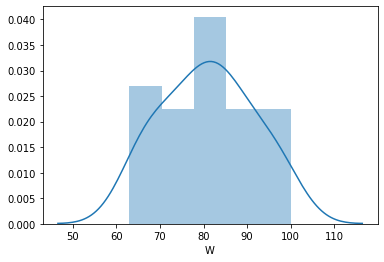

In [699]:
sns.distplot(ds['W'])
plt.show()

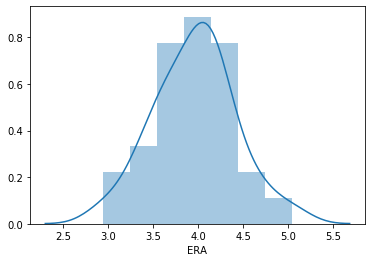

In [700]:
sns.distplot(ds['ERA'])

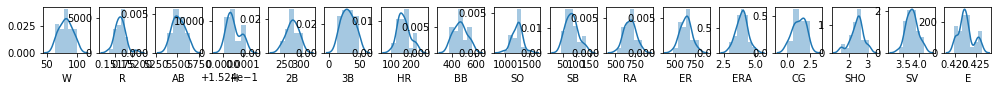

In [701]:
# Checking the distribution plots for all the features at once

plt.figure(figsize=(17, 18))
for i in range(0, len(collist)):
    plt.subplot(nrows, ncols, i+1)
    sns.distplot(ds[collist[i]])

# Removing Outliers

In [702]:
# CHecking the 'z score' / outliers of the dataset, if presnt, will remove it
from scipy.stats import zscore
z_scr = abs(zscore(ds))
print ('Before removing zscore: ', ds.shape)

ds_final = ds.loc[(z_scr < 3).all(axis=1)]
print ("After removing zscore: ", ds_final.shape)

Before removing zscore:  (30, 17)
After removing zscore:  (29, 17)


In [703]:
# Assigning the input and output data
df_x = ds_final.drop(columns = ['W'])
y = ds_final['W']

In [704]:
df_x.shape

(29, 16)

In [705]:
y.shape

(29,)

In [706]:
# StandardScaler is used to scale the data
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns=df_x.columns)

In [707]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.950531,0.830084,1.720533,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.240415,-0.722413,1.554812,-0.422789
1,0.362436,-0.702831,-0.952194,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.240415,0.312085,0.296229,-0.590675
2,-0.233039,-1.100253,-0.084828,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,1.815711,-0.157879,-0.672787,-1.220943
3,-1.344149,0.233951,-0.345091,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.214333,-0.426009,-0.825263,0.559525
4,0.210832,1.255894,2.023649,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.214333,0.312085,-1.142637,-0.590675
5,1.743642,0.716535,-0.047906,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,0.186270,-2.375997,0.667088,-0.023944
6,0.722901,-0.447345,-0.551839,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-1.869855,-0.157879,0.035297,-1.414553
7,-0.811551,-0.447345,-0.307715,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,-0.841793,0.312085,1.952930,0.127870
8,1.432687,1.752672,1.686581,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,0.186270,-0.157879,-0.379227,0.275592
9,1.491612,-0.078310,0.354048,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,0.787648,-0.426009,0.296229,1.678051


In [708]:
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [709]:
# Subroutine to get the best random state with max r2_score

def max_r2_score (regr, x, y):
    max_r2_score = 0
    for r_state in range (42, 100):

        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=r_state, test_size=.20)

        regr.fit(x_train, y_train)
        y_pred = regr.predict(x_test)
        r2_scr = r2_score(y_test, y_pred)


        #print ("\nr2 score corresponding to state: ", r_state, " is: ", r2_scr)
        if (r2_scr > max_r2_score):
            max_r2_score = r2_scr
            final_r_state = r_state
    print ("\nMax r2 score corresponding to ", final_r_state, " is: ", max_r2_score)
    return final_r_state

In [710]:
# lets use linear regression and check max_r2_score corresponding to different random states

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
r_state = max_r2_score(lreg, x, y)


Max r2 score corresponding to  73  is:  0.8419670925120237


In [711]:
# Lets use GridSearchRegressor to find optimal value of n_neighbors for KNN model

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

neighbors ={'n_neighbors' : range(1,27)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr, neighbors, cv=10)
gknr.fit(x, y)
gknr.best_params_

{'n_neighbors': 5}

In [712]:
 # Lets use KNN regression and check max r2 score corresponding to different random states
knr = KNeighborsRegressor(n_neighbors =5)
r_state = max_r2_score(knr, x, y)


Max r2 score corresponding to  44  is:  0.822533333333333


In [713]:
# Lets check the mean r2 score of both linear regression model and knn regression

print ("Mean r2 score for linear regression: ", cross_val_score(lreg, x, y, cv=5, scoring='r2').mean())
print ("Standard deviation for r2 score in linear regression: ", cross_val_score(lreg, x, y, cv=5, scoring='r2').std())
print ("\n*****************\n")
print ("Mean r2 score for KNN regression: ", cross_val_score(knr, x, y, cv=5, scoring='r2').mean())
print ("Standard deviation for r2 score in KNN regression: ", cross_val_score(knr, x, y, cv=5, scoring='r2').std())

Mean r2 score for linear regression:  -0.04153929493640081
Standard deviation for r2 score in linear regression:  0.6157973199764958

*****************

Mean r2 score for KNN regression:  0.013948823210868965
Standard deviation for r2 score in KNN regression:  0.7978211142053168


In [714]:
# Lets check Lasso Regression and find best value of alpha

from sklearn.linear_model import Lasso
lsreg = Lasso()
parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
clf = GridSearchCV(lsreg, parameters, cv=10)
clf.fit(x, y)
clf.best_params_

{'alpha': 1}

In [715]:
# Lets check max r2 score when we use Lasso

lsreg = Lasso(alpha=0.001)
r_state = max_r2_score (lsreg, x, y)


Max r2 score corresponding to  46  is:  0.9001701767292923


In [716]:
# Lets use cross_val_score with Lasso

print ('Mean r2 score for Lasso Regression: ', cross_val_score(lsreg, x, y, cv=5, scoring='r2').mean())
print ('Standard deviation in  r2 score for Lasso Regression: ', cross_val_score(lsreg, x, y, cv=5, scoring='r2').std())

Mean r2 score for Lasso Regression:  0.23518096739929817
Standard deviation in  r2 score for Lasso Regression:  0.44342506113085567


In [717]:
# Now we will use Gradient Boosting technique 
# For getting best set of parameters we will use grid search 

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
parameters = {'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [100,150, 200, 250, 300]}
clf = GridSearchCV(gbr, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.001, 'n_estimators': 300}

In [718]:
# Now we will use cross val score to check the mean r2 score and standard deviation
gbr = GradientBoostingRegressor(learning_rate=0.001, n_estimators=100)
print ('Mean r2 score for Gradient Boosting Regression: ', cross_val_score(gbr, x, y, cv=5, scoring='r2').mean())
print ('Standard Deviation in  r2 score for Gradient Boosting Regression: ', cross_val_score(gbr, x, y, cv=5, scoring='r2').std())

Mean r2 score for Gradient Boosting Regression:  -0.3386145384242008
Standard Deviation in  r2 score for Gradient Boosting Regression:  0.36078713224992326


In [719]:
# lets check maximum r2 score corresponding to this
r_state = max_r2_score(gbr, x, y)


Max r2 score corresponding to  46  is:  0.13728126302336374


In [720]:
# Now Lets use AdaBostRegression algorithm 

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

ada_reg = AdaBoostRegressor()
parameters = {'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [10, 100, 150, 200, 250, 300], 'base_estimator':[lreg, lsreg, DecisionTreeRegressor()]}

clf = GridSearchCV (ada_reg, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 'learning_rate': 0.001,
 'n_estimators': 100}

In [721]:
ada_reg = AdaBoostRegressor(base_estimator = lreg, learning_rate=0.1, n_estimators=100)
print ('Mean r2 score for Ada Boosting Regression: ', cross_val_score(ada_reg, x, y, cv=5, scoring='r2').mean())
print ('Standard Deviation in  r2 score for Ada Boosting Regression: ', cross_val_score(ada_reg, x, y, cv=5, scoring='r2').std())

Mean r2 score for Ada Boosting Regression:  0.4490216382896744
Standard Deviation in  r2 score for Ada Boosting Regression:  0.6710244085284791


In [722]:
# lets check maximum r2 score corresponding to this
r_state = max_r2_score(ada_reg, x, y)


Max r2 score corresponding to  99  is:  0.9299887660840449


In [723]:
# we tried all the models and till now and best model will be selected
# random state corresponding to highest r2 score is 82

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=99, test_size = 0.20)
ada_reg = AdaBoostRegressor(base_estimator = lreg, learning_rate=0.01, n_estimators=100)
ada_reg.fit(x_train, y_train)
y_pred =  ada_reg.predict(x_test)
print (y_pred)

[65.91720446 57.22352414 96.31871735 77.47769774 89.36982112 93.28415382]


In [724]:
dft = pd.DataFrame(y_pred)
dft.to_csv ('pred_baseball.csv')

In [725]:
# Lets find RMSE and r2 sciore using sklearn.metrics

print ("RMSE is: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print ('r2 score is: ', r2_score(y_test, y_pred))

RMSE is:  3.6380289597532163
r2 score is:  0.9132430499577366


In [726]:
# saving the model 

from sklearn.externals import joblib
joblib.dump(lsreg, 'Prj_Baseball.pkl')
#clf = joblib.load('Prj_Baseball.pkl')
#clf.predict(x_test)

['Prj_Baseball.pkl']